<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string,spacy

In [2]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


In [3]:
tweets = pd.read_csv('/content/Elon_musk.csv',encoding='latin-1')

In [4]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
tweets.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
tweets = [Text.strip() for Text in tweets['Text']]

In [8]:
tweets = [Text for Text in tweets if Text] #removes empty strings

In [9]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [10]:
tweets_text = ' '.join(tweets)

In [11]:
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
from nltk.tokenize import TweetTokenizer

In [39]:
tknr = TweetTokenizer(strip_handles=True)
tweets_tokens = tknr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [14]:
tweets_token_text = ' '.join(tweets_tokens)

In [15]:
tweets_token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [40]:
no_punc_text = tweets_token_text.translate(str.maketrans('','',string.punctuation))

In [41]:
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [42]:
import re

In [43]:
no_url = re.sub(r'http\S+','',no_punc_text)

In [44]:
no_url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [45]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url)
text_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitel

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
len(tweets_token_text)

119173

In [23]:
len(tweets_tokens)

20832

In [24]:
len(tweets_text)

158702

In [46]:
len(text_tokens)

17847

In [48]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','Yes','I','U0001F923']
stopwords.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)
len(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cas

11489

In [50]:
lower_case = [Text.lower() for Text in no_stop_tokens]
lower_case[100:200]

['mission',
 'once',
 'predict',
 'cash',
 'flow',
 'reasonably',
 'well',
 'starlink',
 'ipo',
 'starlink',
 'staggeringly',
 'difficult',
 'technical',
 'economic',
 'endeavor',
 'however',
 'spacex',
 'needs',
 'pass',
 'deep',
 'chasm',
 'negative',
 'cash',
 'flow',
 'next',
 'year',
 'lowest',
 'cost',
 'per',
 'ton',
 'carbon',
 'sequestered',
 'net',
 'value',
 'product',
 'made',
 'must',
 'scalable',
 'g',
 'it',
 'meant',
 'price',
 'countries',
 'only',
 'difference',
 'taxes',
 'shipping',
 'this',
 'intended',
 'earth',
 'may',
 'ideas',
 'apply',
 'mars',
 'xprize',
 'team',
 'manage',
 '100m',
 'carbon',
 'capture',
 'prize',
 'everyone',
 'tesla',
 'receives',
 'stock',
 'my',
 'comp',
 'stock',
 'options',
 'take',
 'table',
 'that',
 'missing',
 'back',
 'work',
 'go',
 'does',
 'seem',
 'bit',
 'high',
 'doge',
 'appears',
 'inflationary',
 'meaningfully',
 'fixed',
 'coins',
 'per',
 'unit',
 'time',
 'whereas',
 'wow',
 '1',
 'orbital',
 'launch',
 'tower',
 'stac

In [51]:
from nltk.stem import PorterStemmer

In [52]:
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in lower_case]

In [53]:
stemmed

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'haha',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission

In [78]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_case))
doc


alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power haha any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended e

In [79]:
lemmas = [token.lemma_ for token in doc]
lemmas

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'it',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'haha',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'luna

In [80]:
clean_tweets = ' '.join(lemmas)

In [81]:
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimated congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power haha any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_nlp = cv.fit_transform(lemmas)

In [83]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2354, 'trace': 3020, 'cyberpunk': 768, 'hdr': 1361, 'nextlevel': 1965, 'have': 1356, 'try': 3051, 'great': 1309, 'interview': 1560, 'doge': 893, 'underestimated': 3185, 'congratulation': 675, 'tesla': 2928, 'china': 585, 'amazing': 216, 'execution': 1060, 'last': 1645, 'year': 3405, 'now': 1993, 'next': 1964, 'even': 1034, 'happy': 1343, 'new': 1962, 'ox': 2094, 'frodo': 1211, 'underdoge': 3184, 'all': 196, 'thought': 2964, 'would': 3391, 'fail': 1094, 'himself': 1404, 'haha': 1332, 'thank': 2938, 'indeed': 1501, 'tweet': 3066, 'definitely': 806, 'represent': 2421, 'realworld': 2369, 'time': 2980, 'allocation': 198, 'the': 2943, 'entertaining': 1004, 'outcome': 2073, 'likely': 1700, 'just': 1602, 'send': 2564, 'agree': 179, 'clubhouse': 614, 'it': 1579, 'get': 1270, 'real': 2364, 'buy': 503, 'dogecoin': 895, 'lil': 1701, 'toddler': 2991, 'hodler': 1410, 'he': 1362, 'issue': 1578, 'sentencing': 2568, 'seem': 2556, 'bit': 419, 'high': 1396, 'fix': 1156, 'please': 21

In [84]:
cv.get_feature_names_out()[100:200]

array(['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber',
       'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence',
       'absolute', 'absolutely', 'absorb', 'absorption', 'absurd',
       'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate',
       'acceleration', 'accelerator', 'accept', 'acceptable', 'access',
       'accessible', 'accident', 'accidental', 'accommodate', 'account',
       'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement',
       'achy', 'acquisition', 'across', 'action', 'active', 'activity',
       'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add',
       'additive', 'address', 'administer', 'adult', 'advanc', 'advance',
       'advanced', 'advantage', 'adventure', 'advertise', 'advice',
       'advise', 'aero', 'afb', 'affair', 'affect', 'affordable',
       'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree',
       'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane',
     

In [85]:
tweets_nlp.toarray()[100:200]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
tweets_nlp.toarray().shape

(11514, 3425)

In [87]:
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [88]:
cv_ngram_range.get_feature_names_out()

array(['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come',
       'complete', 'cool', 'could', 'crew', 'day', 'design', 'do',
       'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon',
       'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great',
       'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch',
       'life', 'like', 'look', 'lot', 'love', 'make', 'many', 'maybe',
       'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not',
       'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably',
       'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon',
       'space', 'spacex', 'starlink', 'starship', 'still', 'super',
       'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there',
       'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use',
       'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah',
       'year', 'you'], dtype=object)

In [89]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tfidf = TfidfVectorizer(norm='l2',analyzer='word', ngram_range=(1,3),max_features=500)
matrix = tfidf.fit_transform(lemmas)

In [93]:
tfidf.get_feature_names_out()

array(['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60',
       'able', 'absolutely', 'access', 'accurate', 'actually', 'add',
       'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost',
       'already', 'also', 'although', 'always', 'amazing', 'and',
       'another', 'appear', 'apply', 'appreciate', 'approval', 'arm',
       'around', 'article', 'as', 'astronaut', 'at', 'autopilot',
       'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become',
       'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain',
       'bring', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera',
       'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change',
       'china', 'civilization', 'close', 'cold', 'color', 'come',
       'company', 'complete', 'computer', 'confirm', 'congratulation',
       'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy',
       'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck',
       'da

In [94]:
matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

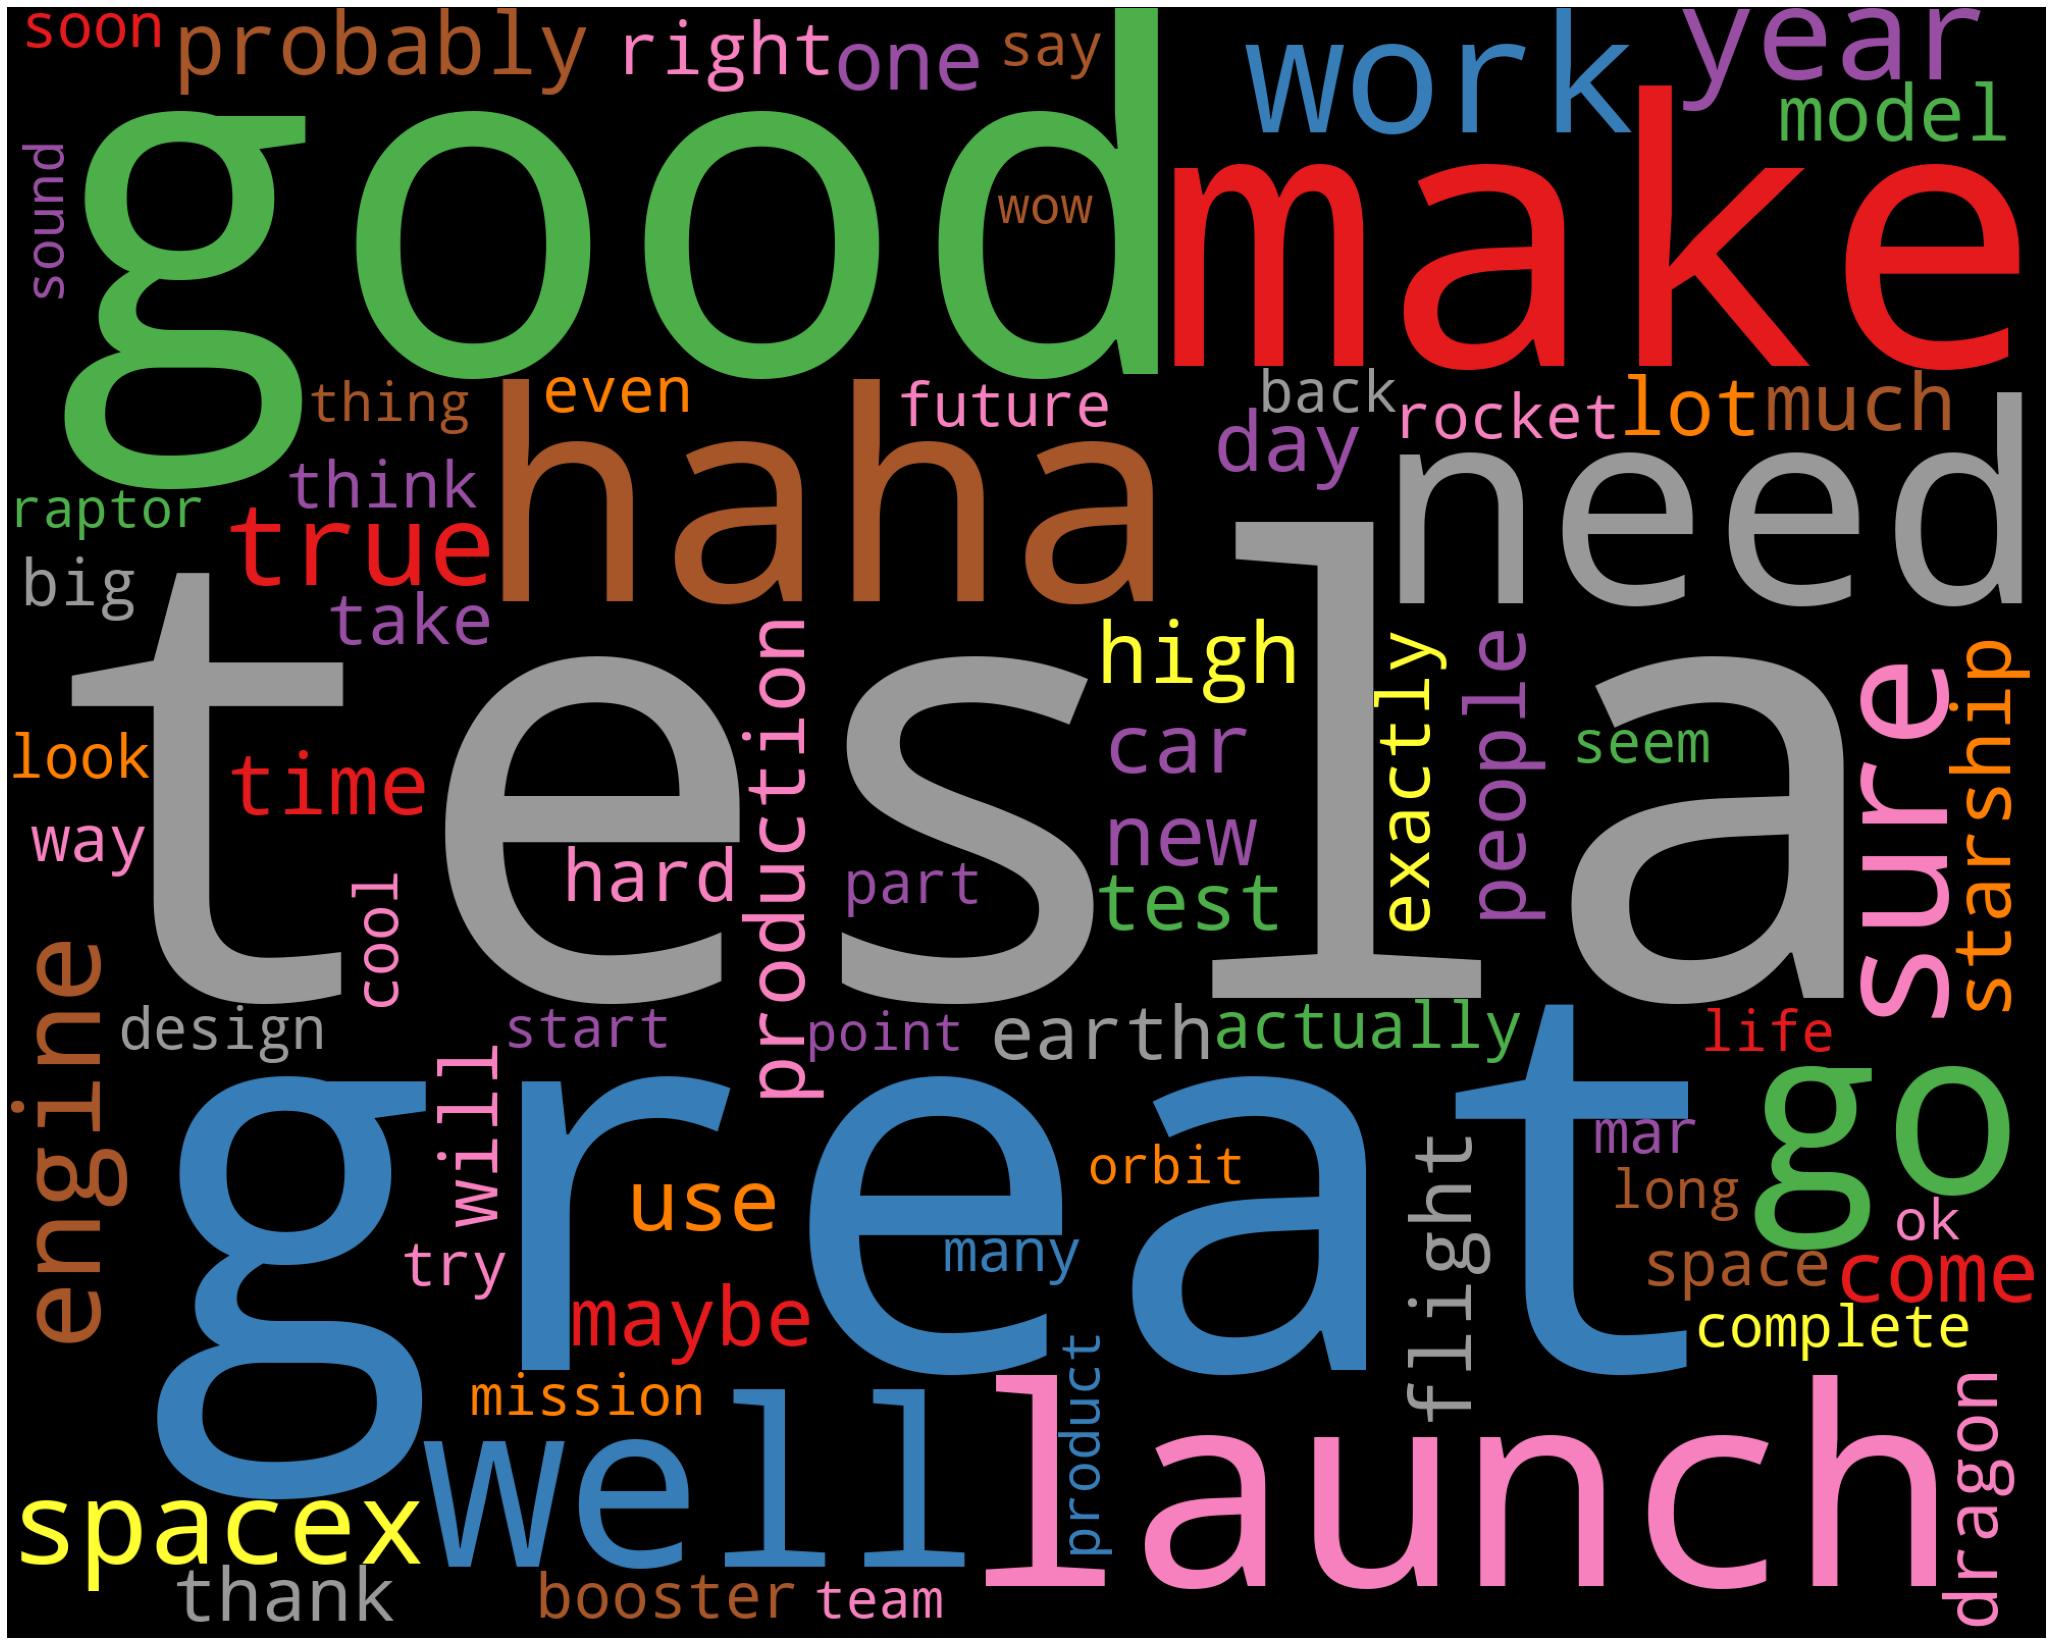

In [96]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width=2000, height= 1600,max_words = 75, colormap='Set1',background_color='black', stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [99]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,jupyter=True,style='ent')

In [100]:
for token in doc_block[100:200]:
  print(token, token.pos_)

mission NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo ADJ
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g PROPN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea VERB
apply VERB
mar PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INT

In [101]:
noun_verb = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[100:200])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'earth', 'tell', 'story', 'tesla', 'read', 'kingdom', 'haven', 'hear', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'u0001f5a4', 'destiny', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'isp', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'point', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try']


In [102]:
cv_model = CountVectorizer()

In [103]:
X = cv_model.fit_transform(noun_verb)

In [105]:
sum = X.sum(axis=0)
word_frq = [(word,sum[0,idx]) for word,idx in cv_model.vocabulary_.items()]
word_frq = sorted(word_frq, key=lambda x:x[1], reverse=True)
wd_fr = pd.DataFrame(word_frq, columns=['word','count'])

In [106]:
wd_fr

,word,count
0,tesla,89
1,make,64
2,launch,54
3,year,48
4,go,48
...,...,...
1952,propaganda,1
1953,click,1
1954,gamgee,1
1955,altho,1


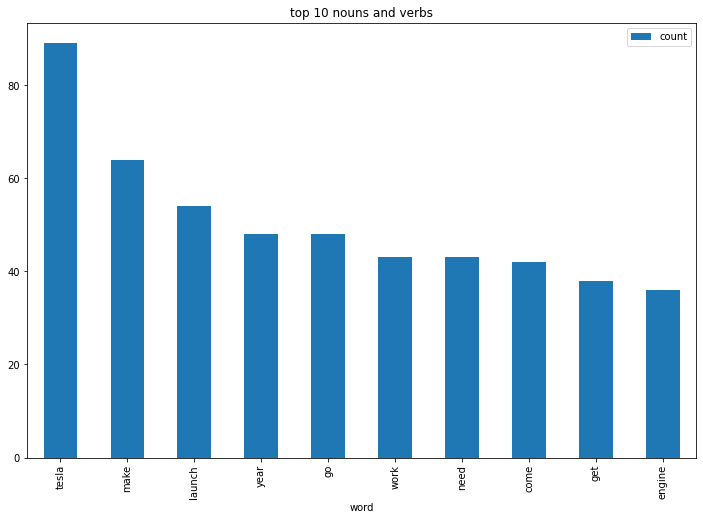

In [107]:
wd_fr[0:10].plot.bar(x='word', figsize=(12,8),title='top 10 nouns and verbs')

In [108]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [109]:
from nltk import tokenize

In [111]:
sentences = tokenize.sent_tokenize(' '.join(tweets))

In [112]:
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [114]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])

In [115]:
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [119]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=29b28c616dad6ab9b81cd8b0f439547d67fa86154d3ca25247372258edaf0659
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [120]:
from afinn import Afinn

In [121]:
afn = Afinn()

In [123]:
afn

In [128]:
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')

In [129]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [130]:
affin_scores = afinn.set_index('word')['value'].to_dict()

In [131]:
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [136]:
nlp = spacy.load('en_core_web_sm')
def cal_sentiment(text:string=None):
  senti_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      senti_score+=affin_scores.get(word.lemma_,0)
  return senti_score
  

In [147]:
cal_sentiment(text='great')

3

In [148]:
sent_df['senti_value'] = sent_df['sentence'].apply(cal_sentiment)

In [149]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)

In [150]:
sent_df.describe()

,senti_value,word_count
count,924.000000,924.000000
mean,1.312771,22.844156
std,2.647718,24.133961
min,-8.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,14.000000
75%,3.000000,31.000000
max,17.000000,231.000000


In [153]:
negative = sent_df[sent_df['senti_value']<0]

In [154]:
positive = sent_df[sent_df['senti_value']>0]

In [165]:
positive

,sentence,senti_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [155]:
sent_df

,sentence,senti_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [163]:
sent_df[sent_df['senti_value']==0]

,sentence,senti_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
8,Tweets definitely do not represent real-world ...,0,8
...,...,...,...
914,That is a revolution in automotive body engine...,0,9
916,@PPathole @IheartTesla For sure.,0,4
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
921,Details Aug 28.,0,3


In [156]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


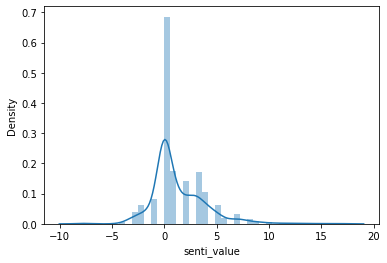

In [157]:
sns.distplot(sent_df['senti_value'])

In [158]:
sent_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


senti_value    1.492886
word_count     2.374239
dtype: float64

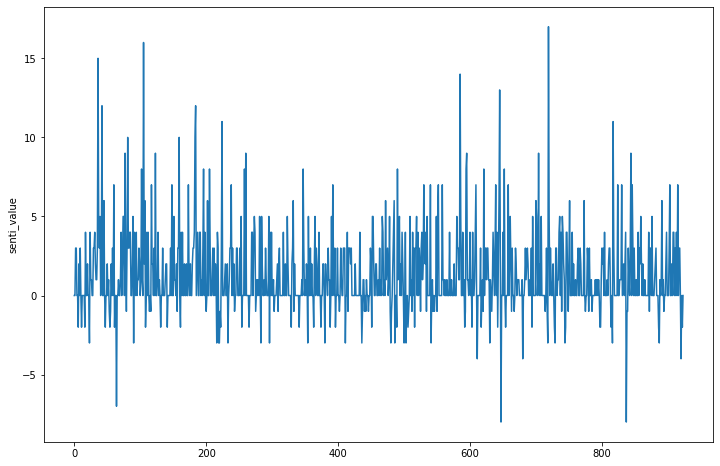

In [161]:

plt.figure(figsize=(12,8))
sns.lineplot(x=sent_df.index, y='senti_value',data=sent_df)

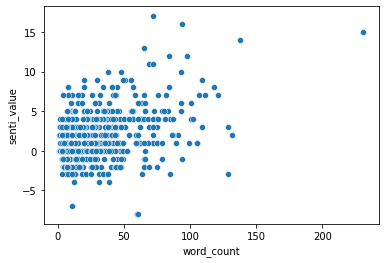

In [162]:
sns.scatterplot(x='word_count',y='senti_value',data=sent_df)

There are more positive tweets compared  to negative and neutral